In [8]:
import pandas as pd
import statsmodels.api as sm
import seaborn as sns
import matplotlib.pyplot as plt
df = pd.read_csv(r"C:\Users\Typhonicus\Desktop\Springboard\8\housing.csv", index_col=False)


In [9]:
df.shape

(1198, 51)

In [10]:
y = df[df.columns[-2]]
x = df[list(df.columns[0:48])]

In [11]:
x = sm.add_constant(x)

C:\Users\Typhonicus\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2542: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [12]:
model = sm.OLS(y, x).fit()
print_model = model.summary()
print(print_model)

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.893
Method:                 Least Squares   F-statistic:                     212.5
Date:                Fri, 08 May 2020   Prob (F-statistic):               0.00
Time:                        00:50:27   Log-Likelihood:                -13700.
No. Observations:                1198   AIC:                         2.750e+04
Df Residuals:                    1150   BIC:                         2.774e+04
Df Model:                          47                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                    -

In [13]:
#corr_matrix = df.corr()
#plt.figure(figsize=(22, 17))
#sns.heatmap(corr_matrix, xticklabels=corr_matrix.columns, yticklabels=corr_matrix.columns, annot=True)
#plt.title('Correlation Heatmap')

In [14]:
df.head()

,Id,Mszoning - RL,Mszoning - RM,LotArea,LotShape - Reg,Neighborhood - NoRidge,Neighborhood - NridgHt,OverallQual,Age,Years since remodel,...,GarageFinish - Unf,GarageFinish - NA,GarageCars,GarageArea,GarageQual - Numerical,GarageCond - Numerical,WoodDeckSF,OpenPorchSF,SalePrice,Forecast
0,1,1,0,8450,1,0,0,7,17,17,...,0,0,2,548,3,3,0,61,208500,204663.0710
1,2,1,0,9600,1,0,0,6,44,44,...,0,0,2,460,3,3,298,0,181500,182712.7907
2,3,1,0,11250,0,0,0,7,19,18,...,0,0,2,608,3,3,0,42,223500,216141.3021
3,5,1,0,14260,0,1,0,8,20,20,...,0,0,3,836,3,3,192,84,250000,299046.6331
4,6,1,0,14115,0,0,0,5,27,25,...,1,0,2,480,3,3,40,30,143000,160805.9364


In [15]:
x_plot = df["SalePrice"]
y_plot = df["Forecast"]

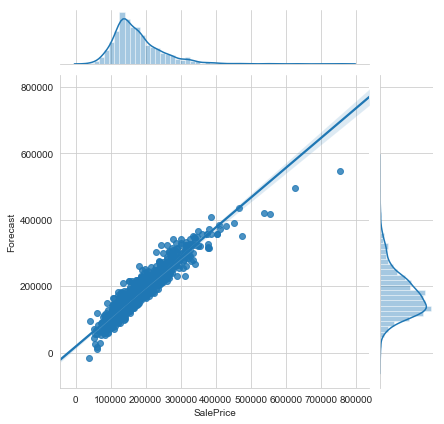

In [16]:
#from scipy import stats
#def r2(x_plot, y_plot):
    #return stats.pearsonr(x_plot, y_plot)[0]** 2
sns.set_style('whitegrid') 
sns.jointplot(x_plot, y_plot, kind="reg", height=6) #,stat_func=r2 (after height)

In [17]:
#print(r2(x_plot,y_plot))

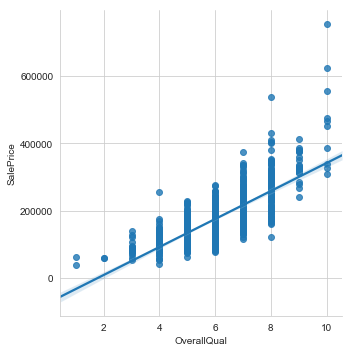

In [18]:
sns.lmplot(x ='OverallQual', y ='SalePrice', data = df) 

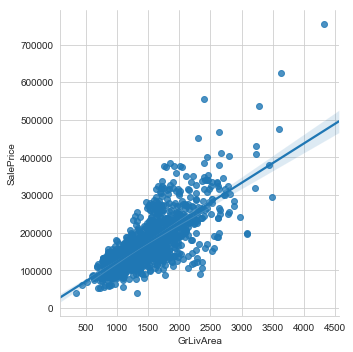

In [19]:
sns.lmplot(x ='GrLivArea', y ='SalePrice', data = df) 

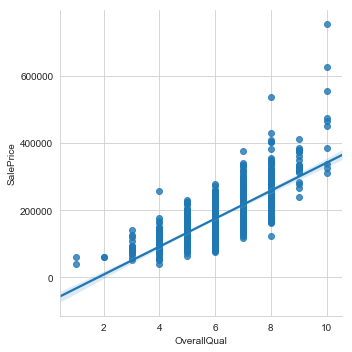

In [20]:
sns.lmplot(x ='OverallQual', y ='SalePrice', data = df) 

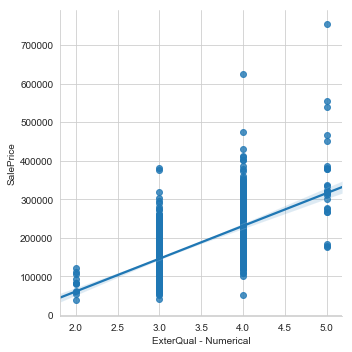

In [21]:
sns.lmplot(x ='ExterQual - Numerical', y ='SalePrice', data = df) 

In [22]:
"Interestingly, not a single housing result is rated Poor"

'Interestingly, not a single housing result is rated Poor'

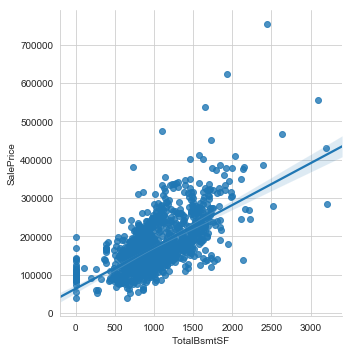

In [23]:
sns.lmplot(x ='TotalBsmtSF', y ='SalePrice', data = df) 

In [24]:
"A garage's total car capacity is a little bit more correllated with Sale Price than a garage's total square feet"

"A garage's total car capacity is a little bit more correllated with Sale Price than a garage's total square feet"

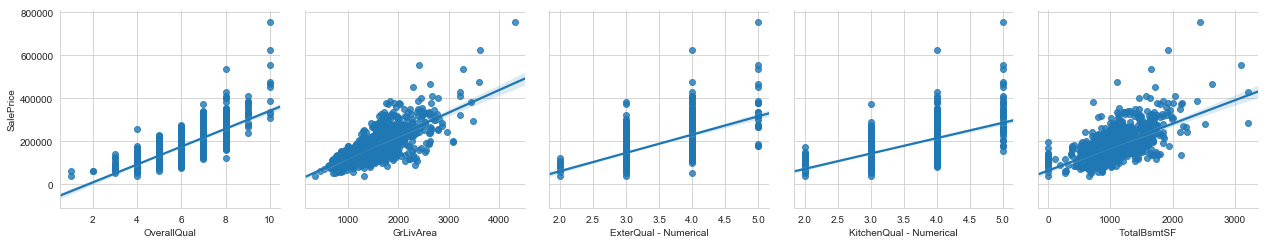

In [25]:
g = sns.PairGrid(df, y_vars=["SalePrice"], x_vars=["OverallQual", "GrLivArea", "ExterQual - Numerical", "KitchenQual - Numerical", "TotalBsmtSF"], height=3.5)
g.map(sns.regplot)

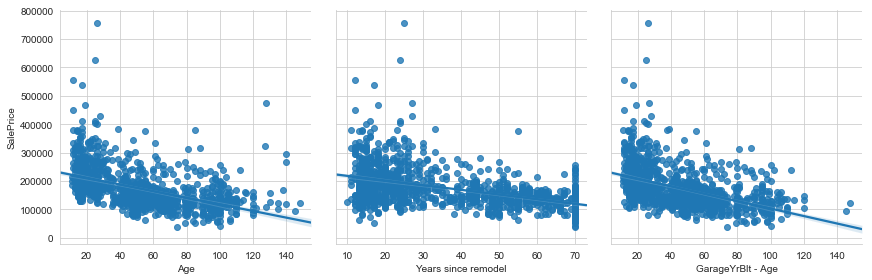

In [26]:
g = sns.PairGrid(df, y_vars=["SalePrice"], x_vars=["Age", "Years since remodel","GarageYrBlt - Age"], height=4)
g.map(sns.regplot)

In [27]:
import numpy as np
np.mean((df.Forecast - df.SalePrice)**2)

499345489.6601487

In [28]:
((df.Forecast - df.SalePrice) ** 2).mean() ** .5

22346.03968626541

In [29]:
np.square(np.subtract(df.Forecast,df.SalePrice)).mean()

499345489.6601487

In [30]:
delta = (((df.SalePrice - df.Forecast)/df.SalePrice)*100).round(2).astype(str) + "%"
df['Delta'] = delta

In [31]:
df.head()

,Id,Mszoning - RL,Mszoning - RM,LotArea,LotShape - Reg,Neighborhood - NoRidge,Neighborhood - NridgHt,OverallQual,Age,Years since remodel,...,GarageFinish - NA,GarageCars,GarageArea,GarageQual - Numerical,GarageCond - Numerical,WoodDeckSF,OpenPorchSF,SalePrice,Forecast,Delta
0,1,1,0,8450,1,0,0,7,17,17,...,0,2,548,3,3,0,61,208500,204663.0710,1.84%
1,2,1,0,9600,1,0,0,6,44,44,...,0,2,460,3,3,298,0,181500,182712.7907,-0.67%
2,3,1,0,11250,0,0,0,7,19,18,...,0,2,608,3,3,0,42,223500,216141.3021,3.29%
3,5,1,0,14260,0,1,0,8,20,20,...,0,3,836,3,3,192,84,250000,299046.6331,-19.62%
4,6,1,0,14115,0,0,0,5,27,25,...,0,2,480,3,3,40,30,143000,160805.9364,-12.45%


In [32]:
df2 = df[["SalePrice", "Forecast", "Delta"]]
df2.reset_index(drop=True, inplace=True)


In [33]:
df2.head(20)

,SalePrice,Forecast,Delta
0,208500,204663.0710,1.84%
1,181500,182712.7907,-0.67%
2,223500,216141.3021,3.29%
3,250000,299046.6331,-19.62%
4,143000,160805.9364,-12.45%
5,307000,253963.1005,17.28%
6,200000,224601.4952,-12.3%
7,118000,138185.0034,-17.11%
8,129500,132821.7337,-2.57%
9,144000,125321.9730,12.97%


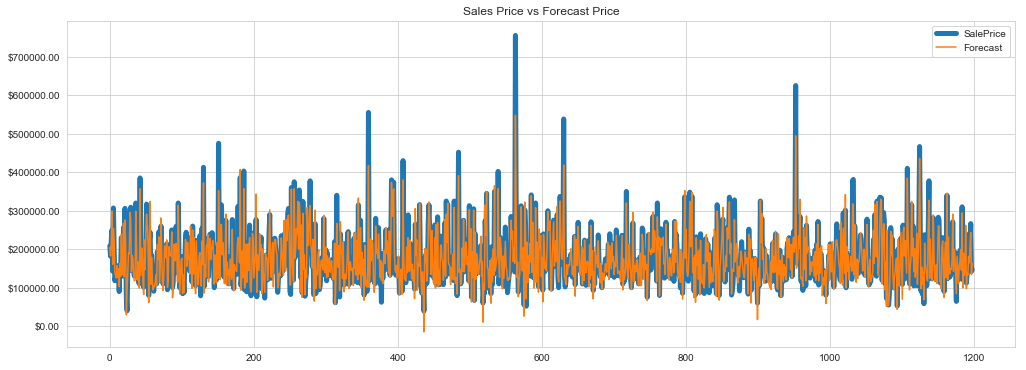

In [41]:
fig, ax = plt.subplots(figsize=(17,6))

ax.plot(df2.index, df2.SalePrice, linewidth=5)
ax.plot(df2.index, df2.Forecast)
plt.title('Sales Price vs Forecast Price')
ax.legend()

import matplotlib.ticker as mtick
dollar_format = '$%.2f'
ticks = mtick.FormatStrFormatter(dollar_format)
ax.yaxis.set_major_formatter(ticks)


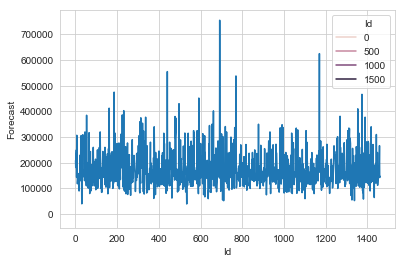

In [29]:
ax1 = sns.lineplot(x="Id", y="SalePrice", data=df)
ax1 = sns.lineplot(x="Id", y="Forecast", hue="Id", data=df)

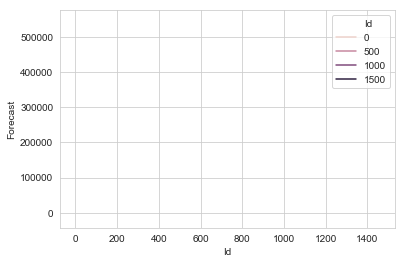

In [28]:
ax1

In [102]:
from scipy.stats import sem, t
from scipy import mean
confidence = 0.95
data = df.Forecast

n = len(data)
m = np.mean(data)
std_err = sem(data)
h = std_err * t.ppf((1 + confidence) / 2, n - 1)

start = m - h
print(start)

171462.5185597236


In [103]:
end = m + h
print(end)

178948.70328084377
